# 7.02 Lab

Data from: [fashion-mnist_train.csv](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv).

Goal is to train neural networks to classify clothing images

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## Data


In [3]:
training_data = pd.read_csv('fashion-mnist_train.csv')

In [3]:
X = training_data.drop(columns='label')
y = training_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [4]:
X_train.shape

(45000, 784)

In [5]:
type(X_train)

pandas.core.frame.DataFrame

In [6]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47457,0,0,0,0,0,0,0,0,3,0,0,0,76,194,204,143,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,104,177,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,35,98,194,150,0,0,0,1,0,0,0,0,0,0,0,0
51279,0,0,0,0,0,0,0,0,35,102,128,119,73,116,112,63,104,126,94,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,34,126,108,105,121,...,255,152,111,136,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,70,90,58,124,159,164,76,121,58,31,48,0,0,0,0,0,0,0,0
760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,5,0,172,217,201,240,228,214,10,0,0,0,0,0,0,0,12,21,19,4,0,0,0,0,5,0,1,0,1,0,0,14,4,10,17,13,0
44505,0,0,0,0,0,0,0,0,0,0,0,80,87,83,87,77,74,71,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30,156,...,159,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,39,0,96,66,0,0,1,0,0,0,0,0,0,0,0
19402,0,0,0,0,0,0,0,0,0,0,1,0,0,71,54,85,31,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,207,209,214,209,195,202,0,0,0,0,0,0,0,0,0,0,0,0,0,68,178,158,172,180,188,194,197,195,195,190,189,186,212,73,0,0,0,0,0,0


In [7]:
X_train['pixel99'].value_counts()

0      15589
255      460
1        357
225      336
217      302
       ...  
53        30
14        28
28        26
18        25
16        19
Name: pixel99, Length: 256, dtype: int64

## Visualize Image Classes

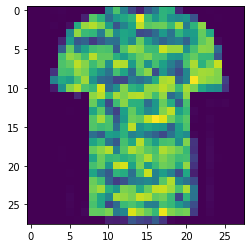

In [25]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 0].drop(columns='label').iloc[0]), (28, 28)))


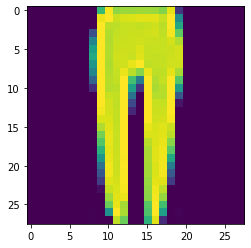

In [26]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 1].drop(columns='label').iloc[0]), (28, 28)))

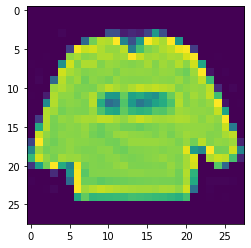

In [27]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 2].drop(columns='label').iloc[0]), (28, 28)))

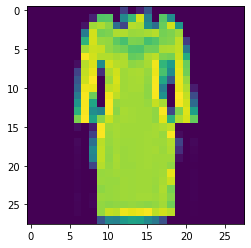

In [28]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 3].drop(columns='label').iloc[0]), (28, 28)))

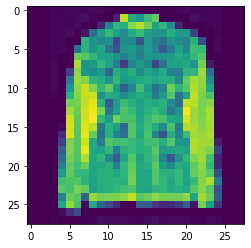

In [29]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 4].drop(columns='label').iloc[0]), (28, 28)))

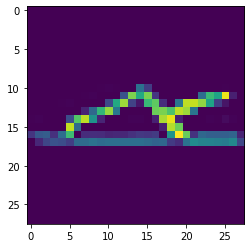

In [30]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 5].drop(columns='label').iloc[0]), (28, 28)))

''

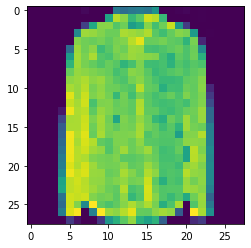

In [32]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 6].drop(columns='label').iloc[0]), (28, 28)))
;

''

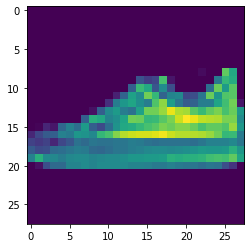

In [33]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 7].drop(columns='label').iloc[0]), (28, 28)))
;

''

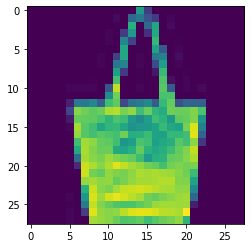

In [34]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 8].drop(columns='label').iloc[0]), (28, 28)))
;

''

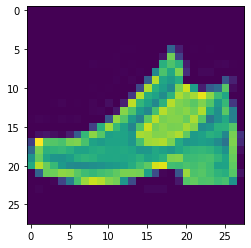

In [35]:
plt.imshow(np.reshape(np.array(training_data[training_data['label'] == 9].drop(columns='label').iloc[0]), (28, 28)))
;

It appears images are encoded to 255, must standarize

## Standarization

In [31]:
X_train /= 255.
X_test /= 255.

In [9]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,0.000000,0.000000,0.298039,0.760784,0.800000,0.560784,0.000000,0.000000,0.000000,0.011765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.000000,0.000000,0.407843,0.694118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.000000,0.000000,0.000000,0.137255,0.384314,0.760784,0.588235,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
51279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137255,0.4,0.501961,0.466667,0.286275,0.454902,0.439216,0.247059,0.407843,0.494118,0.368627,0.047059,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,0.494118,0.423529,0.411765,0.474510,...,1.000000,0.596078,0.435294,0.533333,0.105882,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.152941,0.274510,0.352941,0.227451,0.486275,0.623529,0.643137,0.298039,0.474510,0.227451,0.121569,0.188235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.000000,0.000000,0.019608,0.000000,0.674510,0.85098,0.788235,0.941176,0.894118,0.839216,0.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047059,0.082353,0.074510,0.015686,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.003922,0.000000,0.003922,0.000000,0.000000,0.054902,0.015686,0.039216,0.066667,0.05098,0.0
44505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.313725,0.341176,0.325490,0.341176,0.301961,0.290196,0.278431,0.133333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.000000,0.117647,0.611765,...,0.623529,0.117647,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.384314,0.152941,0.000000,0.376471,0.258824,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
19402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.000000,0.000000,0.278431,0.211765,0.333333,0.121569,0.000000,0.023529,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.000000,0.000000,...,0.811765,0.819608,0.839216,0.819608,0.764706,0.792157,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266667,0.698039,0.619608,0.674510,0.705882,0.737255,0.760784,0.772549,0.764706,0.764706,0.745098,0.741176,0.729412,0.831373,0.286275,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [10]:
X_train.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

## Encode Target

In [11]:
y_train_encoded = utils.to_categorical(y_train, 10)
y_test_encoded = utils.to_categorical(y_test, 10)

In [12]:
y_train_encoded.shape

(45000, 10)

## Baseline

In [13]:
pd.DataFrame(y_train_encoded).value_counts(normalize=True).max()

0.10117777777777778

## Neural Network Model

In [32]:
model1 = Sequential()
# model1.add(Flatten()) # Keeping this out because the DF is already flat?
model1.add(Dense(128, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(10, activation="softmax"))

In [33]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [38]:
hist1 = model1.fit(
    X_train,
    y_train_encoded, 
    batch_size=128,
    validation_data=(X_test, y_test_encoded),
    epochs=100,
    callbacks=EarlyStopping(monitor='loss', patience=5)
    )

Epoch 1/100
352/352 [==============================] - 14s 39ms/step - loss: 0.5477 - accuracy: 0.8022 - val_loss: 124.6145 - val_accuracy: 0.6565
Epoch 2/100
352/352 [==============================] - 15s 44ms/step - loss: 0.5283 - accuracy: 0.8097 - val_loss: 117.8556 - val_accuracy: 0.6605
Epoch 3/100
352/352 [==============================] - 11s 31ms/step - loss: 0.5119 - accuracy: 0.8175 - val_loss: 120.0563 - val_accuracy: 0.6617
Epoch 4/100
352/352 [==============================] - 15s 43ms/step - loss: 0.4992 - accuracy: 0.8218 - val_loss: 118.1628 - val_accuracy: 0.6589
Epoch 5/100
352/352 [==============================] - 11s 32ms/step - loss: 0.4867 - accuracy: 0.8269 - val_loss: 110.1082 - val_accuracy: 0.6681
Epoch 6/100
352/352 [==============================] - 10s 30ms/step - loss: 0.4745 - accuracy: 0.8308 - val_loss: 113.7478 - val_accuracy: 0.6585
Epoch 7/100
352/352 [==============================] - 6s 17ms/step - loss: 0.4652 - accuracy: 0.8341 - val_loss: 115.

### Plot training results

''

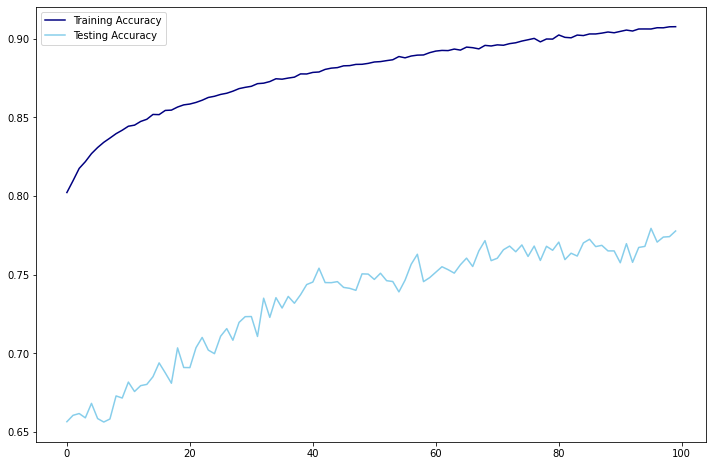

In [39]:
# From lessons/breakfast hour/ lab 7.01
# With help from regularization lesson
train_accuracy = hist1.history['accuracy']
test_accuracy = hist1.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='navy')
plt.plot(test_accuracy, label='Testing Accuracy', color='skyblue')
plt.legend()
;

## Evaluate First Model using the holdout data set

### Read in Data

In [40]:
holdout = pd.read_csv('fashion-mnist_test.csv')

### Transformations

In [41]:
X_test_holdout = holdout.drop(columns='label')
X_test_holdout /= 255.
y_test_holdout = holdout['label']
y_test_holdout_encoded = utils.to_categorical(y_test_holdout, 10)

### Make predictions, Evaluate Model and plot Confusion Matrix

In [42]:
y_preds = model1.predict(X_test_holdout)

In [43]:
model1.evaluate(X_test_holdout, y_test_holdout_encoded)

313/313 [==============================] - 1s 3ms/step - loss: 61.7557 - accuracy: 0.7817


[61.75569534301758, 0.7817000150680542]

#### Baseline Improvement

In [44]:
.7817 - .1012

0.6805

#### Confusion Matrix

''

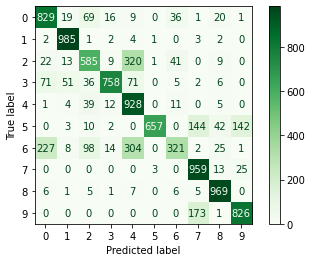

In [45]:
# With help from https://stackoverflow.com/questions/56458526/get-confusion-matrix-from-a-keras-model/56458627
# np.rint
# argmax help from https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test_holdout_encoded.argmax(axis=1), y_pred=np.rint(y_preds).argmax(axis=1), cmap='Greens')
;

## Convolutional Neural Network Model
Add convoluton layers to my previous model and regularization

### Reshape training data for convolution

Initially forgot to reshape test set as well :).

In [46]:
reshaped = []
for i in range(X_train.shape[0]):
  reshaped.append(np.reshape(np.array(X_train.iloc[i]), (28, 28, 1)))


In [47]:
X_train_reshaped = np.array(reshaped)
X_train_reshaped.shape

(45000, 28, 28, 1)

In [48]:
reshaped = []
for i in range(X_test.shape[0]):
  reshaped.append(np.reshape(np.array(X_test.iloc[i]), (28, 28, 1)))


In [49]:
X_test_reshaped = np.array(reshaped)
X_test_reshaped.shape

(15000, 28, 28, 1)

### Model

In [83]:
model2 = Sequential()

model2.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=X_train_reshaped[0].shape, 
))
model2.add(MaxPool2D())

model2.add(Conv2D(
    filters=16,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=X_train_reshaped[0].shape, 
))
model2.add(MaxPool2D())

model2.add(Flatten())

model2.add(Dense(128, activation="relu")) #, kernel_regularizer=l2()))
# model2.add(Dropout(.1))
model2.add(Dense(32, activation="relu")) # , kernel_regularizer=l2()))
model2.add(Dropout(.1))
model2.add(Dense(10, activation="softmax"))

In [84]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [85]:
hist2 = model2.fit(
    X_train_reshaped,
    y_train_encoded, 
    batch_size=128,
    validation_data=(X_test_reshaped, y_test_encoded),
    epochs=100,
    callbacks=EarlyStopping(monitor='val_accuracy', patience=5)
    )

Epoch 1/100
352/352 [==============================] - 5s 10ms/step - loss: 1.4464 - accuracy: 0.4570 - val_loss: 89.0180 - val_accuracy: 0.5361
Epoch 2/100
352/352 [==============================] - 2s 7ms/step - loss: 0.8626 - accuracy: 0.6729 - val_loss: 76.0839 - val_accuracy: 0.6131
Epoch 3/100
352/352 [==============================] - 2s 6ms/step - loss: 0.7731 - accuracy: 0.7059 - val_loss: 78.7218 - val_accuracy: 0.5914
Epoch 4/100
352/352 [==============================] - 2s 6ms/step - loss: 0.7257 - accuracy: 0.7252 - val_loss: 85.3867 - val_accuracy: 0.5557
Epoch 5/100
352/352 [==============================] - 2s 6ms/step - loss: 0.6909 - accuracy: 0.7380 - val_loss: 79.3583 - val_accuracy: 0.5400
Epoch 6/100
352/352 [==============================] - 2s 6ms/step - loss: 0.6574 - accuracy: 0.7486 - val_loss: 62.9739 - val_accuracy: 0.5906
Epoch 7/100
352/352 [==============================] - 2s 6ms/step - loss: 0.6314 - accuracy: 0.7587 - val_loss: 63.4675 - val_accuracy

### Plot training results

''

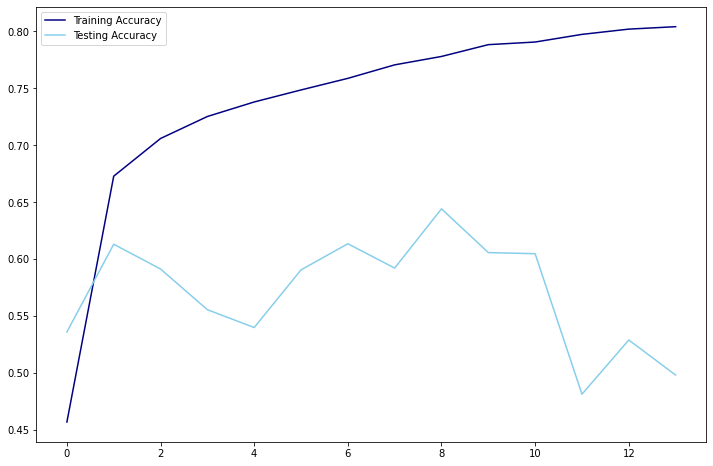

In [86]:
# From lessons/breakfast hour/ lab 7.01
# With help from regularization lesson
train_accuracy = hist2.history['accuracy']
test_accuracy = hist2.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='navy')
plt.plot(test_accuracy, label='Testing Accuracy', color='skyblue')
plt.legend()
;

### Make predictions, Evaluate Model and plot Confusion Matrix

In [87]:
reshaped = []
for i in range(X_test_holdout.shape[0]):
  reshaped.append(np.reshape(np.array(X_test_holdout.iloc[i]), (28, 28, 1)))

X_test_holdout_reshaped = np.array(reshaped)
X_test_holdout_reshaped.shape


(10000, 28, 28, 1)

In [88]:
y_preds = model2.predict(X_test_holdout_reshaped)

In [89]:
model2.evaluate(X_test_holdout_reshaped, y_test_holdout_encoded)

313/313 [==============================] - 1s 3ms/step - loss: 121.2693 - accuracy: 0.4924


[121.26927185058594, 0.49239999055862427]

### Confusion Matrix

''

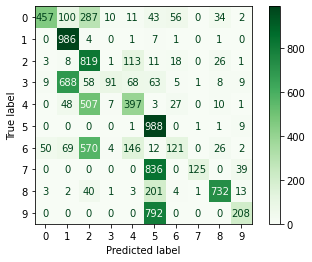

In [90]:
# With help from https://stackoverflow.com/questions/56458526/get-confusion-matrix-from-a-keras-model/56458627
# np.rint
# argmax help from https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test_holdout_encoded.argmax(axis=1), y_pred=np.rint(y_preds).argmax(axis=1), cmap='Greens')
;